In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../../data/processed/final-dataset.csv')
df = df[df['team'] != df['opponent_team']]
df = df.reset_index(drop=True)
df.head()

,season,name,position,team,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,xP,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016/17,Aaron Cresswell,DEF,West Ham United,0,0,0,0,0.0,454,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-08-15T19:00:00Z,0,Aston Villa,0,0,0,0,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1
1,2016/17,Aaron Lennon,MID,Everton,0,0,6,0,0.3,142,3,0,0,0.9,8.2,0.0,0.0,0.0,0.0,0.0,2016-08-13T14:00:00Z,15,Brighton & Hove Albion,0,0,0,0,0,13918,1.0,1.0,0.0,1,0,0,0,60,True,0,1
2,2016/17,Aaron Ramsey,MID,Arsenal,0,0,5,0,4.9,16,8,3,0,3.0,2.2,0.0,0.0,0.0,0.0,0.0,2016-08-14T15:00:00Z,60,Wolverhampton Wanderers,0,0,0,0,0,163170,4.0,3.0,23.0,2,0,0,0,80,True,0,1
3,2016/17,Abdoulaye Doucouré,MID,Watford,0,0,0,0,0.0,482,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-08-13T14:00:00Z,0,Southampton,0,0,0,0,0,1051,1.0,1.0,0.0,0,0,0,0,50,False,0,1
4,2016/17,Abdul Baba,DEF,Chelsea,0,0,0,0,0.0,80,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-08-15T19:00:00Z,0,Manchester City,0,0,0,0,0,1243,1.0,2.0,0.0,0,0,0,0,55,True,0,1


## Feature Engineering

In [3]:
df = df.sort_values(by=['kickoff_time']).reset_index(drop=True)

In [4]:
df

,season,name,position,team,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,xP,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016/17,Leonardo Ulloa,FWD,Leicester City,0,0,2,0,0.1,185,4,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2016-08-13T11:30:00Z,8,Tottenham Hotspur,0,0,0,0,0,9918,1.0,2.0,0.0,1,0,0,0,60,False,0,1
1,2016/17,Ron-Robert Zieler,GK,Leicester City,0,0,0,0,0.0,166,4,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2016-08-13T11:30:00Z,0,Tottenham Hotspur,0,0,0,0,0,9175,1.0,2.0,0.0,0,0,0,0,45,False,0,1
2,2016/17,Moses Odubajo,MID,Hull City,0,0,0,0,0.0,151,4,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2016-08-13T11:30:00Z,0,Leicester City,0,0,0,0,0,313,1.0,2.0,0.0,0,0,0,0,45,True,0,1
3,2016/17,Robert Snodgrass,MID,Hull City,0,3,40,0,37.7,155,4,1,1,12.0,46.6,0.0,0.00,0.00,0.0,0.00,2016-08-13T11:30:00Z,90,Leicester City,0,0,0,0,0,15838,1.0,2.0,36.0,10,0,0,0,55,True,0,1
4,2016/17,Robert Huth,DEF,Leicester City,0,0,0,0,0.0,173,4,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2016-08-13T11:30:00Z,0,Tottenham Hotspur,0,0,0,0,0,31577,1.0,2.0,0.0,0,0,0,0,50,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197536,2024/25,Josh Dasilva,MID,Brentford,0,0,0,0,0.0,90,16,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2024-08-25T15:30:00Z,0,Liverpool,0,0,0,0,0,755,0.0,2.0,0.0,0,-353,22,375,50,False,0,2
197537,2024/25,Mohamed Salah,MID,Liverpool,0,2,34,1,6.2,328,16,0,1,9.7,38.8,12.5,0.25,0.75,0.5,0.36,2024-08-25T15:30:00Z,82,Brentford,0,0,0,0,0,3503305,0.0,2.0,52.0,10,198112,262302,64190,125,True,0,2
197538,2024/25,Ivan Toney,FWD,Brentford,0,0,0,0,0.0,108,16,0,0,0.0,0.0,-0.5,0.00,0.00,0.0,0.00,2024-08-25T15:30:00Z,0,Liverpool,0,0,0,0,0,581058,0.0,2.0,0.0,0,-282801,19997,302798,74,False,0,2
197539,2024/25,Yunus Konak,MID,Brentford,0,0,0,0,0.0,97,16,0,0,0.0,0.0,-0.5,0.00,0.00,0.0,0.00,2024-08-25T15:30:00Z,0,Liverpool,0,0,0,0,0,5815,0.0,2.0,0.0,0,-230,453,683,45,False,0,2


### Create New Features

#### Calculate Last 5 Features (Team's Side)

In [5]:
def calculate_points(row):
    if row['was_home'] == 1:
        # Tim bermain kandang
        if row['team_a_score'] < row['team_h_score']:
            return 3  # Menang kandang
        elif row['team_a_score'] > row['team_h_score']:
            return 0  # Kalah kandang
        else:
            return 1  # Imbang
    else:
        # Tim bermain tandang
        if row['team_a_score'] > row['team_h_score']:
            return 3  # Menang tandang
        elif row['team_a_score'] < row['team_h_score']:
            return 0  # Kalah tandang
        else:
            return 1  # Imbang
        
df['points'] = df.apply(calculate_points, axis=1)

In [6]:
df['team_tot_points_last_5_matches'] = df.groupby('team')['points'].rolling(window=5, min_periods=1).sum().reset_index(level=0, drop=True)

df['team_tot_points_last_5_h2h'] = df.groupby(['team', 'opponent_team'])['points'].\
    rolling(window=5, min_periods=1).sum().reset_index(level=[0, 1], drop=True)

In [7]:
df.drop('points', axis=1, inplace=True)

In [8]:
df

,season,name,position,team,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,xP,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,team_tot_points_last_5_matches,team_tot_points_last_5_h2h
0,2016/17,Leonardo Ulloa,FWD,Leicester City,0,0,2,0,0.1,185,4,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2016-08-13T11:30:00Z,8,Tottenham Hotspur,0,0,0,0,0,9918,1.0,2.0,0.0,1,0,0,0,60,False,0,1,0.0,0.0
1,2016/17,Ron-Robert Zieler,GK,Leicester City,0,0,0,0,0.0,166,4,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2016-08-13T11:30:00Z,0,Tottenham Hotspur,0,0,0,0,0,9175,1.0,2.0,0.0,0,0,0,0,45,False,0,1,0.0,0.0
2,2016/17,Moses Odubajo,MID,Hull City,0,0,0,0,0.0,151,4,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2016-08-13T11:30:00Z,0,Leicester City,0,0,0,0,0,313,1.0,2.0,0.0,0,0,0,0,45,True,0,1,3.0,3.0
3,2016/17,Robert Snodgrass,MID,Hull City,0,3,40,0,37.7,155,4,1,1,12.0,46.6,0.0,0.00,0.00,0.0,0.00,2016-08-13T11:30:00Z,90,Leicester City,0,0,0,0,0,15838,1.0,2.0,36.0,10,0,0,0,55,True,0,1,6.0,6.0
4,2016/17,Robert Huth,DEF,Leicester City,0,0,0,0,0.0,173,4,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2016-08-13T11:30:00Z,0,Tottenham Hotspur,0,0,0,0,0,31577,1.0,2.0,0.0,0,0,0,0,50,False,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197536,2024/25,Josh Dasilva,MID,Brentford,0,0,0,0,0.0,90,16,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2024-08-25T15:30:00Z,0,Liverpool,0,0,0,0,0,755,0.0,2.0,0.0,0,-353,22,375,50,False,0,2,0.0,0.0
197537,2024/25,Mohamed Salah,MID,Liverpool,0,2,34,1,6.2,328,16,0,1,9.7,38.8,12.5,0.25,0.75,0.5,0.36,2024-08-25T15:30:00Z,82,Brentford,0,0,0,0,0,3503305,0.0,2.0,52.0,10,198112,262302,64190,125,True,0,2,15.0,15.0
197538,2024/25,Ivan Toney,FWD,Brentford,0,0,0,0,0.0,108,16,0,0,0.0,0.0,-0.5,0.00,0.00,0.0,0.00,2024-08-25T15:30:00Z,0,Liverpool,0,0,0,0,0,581058,0.0,2.0,0.0,0,-282801,19997,302798,74,False,0,2,0.0,0.0
197539,2024/25,Yunus Konak,MID,Brentford,0,0,0,0,0.0,97,16,0,0,0.0,0.0,-0.5,0.00,0.00,0.0,0.00,2024-08-25T15:30:00Z,0,Liverpool,0,0,0,0,0,5815,0.0,2.0,0.0,0,-230,453,683,45,False,0,2,0.0,0.0


#### Calculate Last 5 Features (Player's Side)

Calculate Last 5 Features against Specific Team

In [9]:
def players_last_5_feature_vs_specific_team(df, agg_type, column_name):    
    if agg_type == 'sum':    
        df[f'tot_{column_name}_last_5_h2h'] = df.groupby(['name', 'opponent_team'])[column_name].rolling(window=5, min_periods=1).sum().reset_index(level=[0, 1], drop=True)
        df[f'tot_{column_name}_last_5_h2h'] = df[f'tot_{column_name}_last_5_h2h'].astype(int)
    
    elif agg_type == 'avg':
        df[f'avg_{column_name}_last_5_h2h'] = df.groupby(['name', 'opponent_team'])[column_name].rolling(window=5, min_periods=1).mean().reset_index(level=[0, 1], drop=True)
        df[f'avg_{column_name}_last_5_h2h'] = round(df[f'avg_{column_name}_last_5_h2h'].astype(float))
        
    return df

In [10]:
sum_cols = ['assists', 'bonus', 'bps', 'clean_sheets', 'goals_conceded', 'goals_scored', 'own_goals', 
                  'penalties_missed', 'penalties_saved', 'red_cards', 'yellow_cards', 'saves', 'total_points']

avg_cols = ['ict_index', 'influence', 'creativity', 'threat', 'selected', 'minutes']

for col in sum_cols:
    df = players_last_5_feature_vs_specific_team(df, 'sum', col)
    
for col in avg_cols:
    df = players_last_5_feature_vs_specific_team(df, 'avg', col)

Calculate Last 5 Match Features against No Specific Team

In [11]:
def players_last_5_feature_vs_every_team(df, agg_type, column_name):    
    if agg_type == 'sum':    
        df[f'tot_{column_name}_last_5'] = df.groupby(['name'])[column_name].rolling(window=5, min_periods=1).sum().reset_index(level=0, drop=True)
        df[f'tot_{column_name}_last_5'] = df[f'tot_{column_name}_last_5'].astype(int)
    
    elif agg_type == 'avg':
        df[f'avg_{column_name}_last_5'] = df.groupby(['name'])[column_name].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
        df[f'avg_{column_name}_last_5'] = round(df[f'avg_{column_name}_last_5'].astype(float))
        
    return df

In [12]:
sum_cols = ['assists', 'bonus', 'bps', 'clean_sheets', 'goals_conceded', 'goals_scored', 'own_goals', 
            'penalties_missed', 'penalties_saved', 'red_cards', 'yellow_cards', 'saves', 'total_points']

avg_cols = ['ict_index', 'influence', 'creativity', 'threat', 'selected', 'minutes']

for col in sum_cols:
    df = players_last_5_feature_vs_every_team(df, 'sum', col)
    
for col in avg_cols:
    df = players_last_5_feature_vs_every_team(df, 'avg', col)

Filter the dataset without season == 2024/25

In [13]:
df_2425_upd_feat = df[df['season']=='2024/25']

In [14]:
other_cols = ['element', 'fixture', 'xP', 'expected_assists', 'expected_goal_involvements', 'expected_goals', 
              'transfers_balance', 'transfers_in', 'transfers_out', 'expected_goals_conceded', 'kickoff_time', 
              'team_a_score', 'team_h_score', 'value', 'minutes']

drop_cols = sum_cols + avg_cols + other_cols
drop_cols = [col for col in drop_cols if col not in ['total_points']] ## 'total_points' not included, cause this feature will be used for target model

df.drop(columns=(drop_cols), inplace=True)
df_2425_upd_feat = df_2425_upd_feat.drop(columns=(drop_cols))

In [15]:
def save_gw_data(df, gw):
    df.drop(['season', 'GW'], axis=1, inplace=True)
    df.reset_index(drop=True).\
        to_csv(f'../../data/fpl/gw-{gw}/fpl_2425_updated_features.csv', index=False)

In [16]:
df_2425_gw_1 = df_2425_upd_feat[df_2425_upd_feat['GW'] == 1] ## Change GW number manually
df_2425_gw_2 = df_2425_upd_feat[df_2425_upd_feat['GW'] == 2]
df_2425_gw_3 = df_2425_upd_feat[df_2425_upd_feat['GW'] == 3]

save_gw_data(df_2425_gw_1, gw=1)
save_gw_data(df_2425_gw_2, gw=2)
save_gw_data(df_2425_gw_3, gw=3)

C:\Users\marse\AppData\Local\Temp\ipykernel_27392\2180062574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['season', 'GW'], axis=1, inplace=True)
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\2180062574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['season', 'GW'], axis=1, inplace=True)
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\2180062574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.d

In [17]:
df = df.sort_values(by=['team', 'opponent_team', 'season', 'GW'])
df = df.reset_index(drop=True)
df.head()

,season,name,position,team,opponent_team,total_points,was_home,GW,team_tot_points_last_5_matches,team_tot_points_last_5_h2h,tot_assists_last_5_h2h,tot_bonus_last_5_h2h,tot_bps_last_5_h2h,tot_clean_sheets_last_5_h2h,tot_goals_conceded_last_5_h2h,tot_goals_scored_last_5_h2h,tot_own_goals_last_5_h2h,tot_penalties_missed_last_5_h2h,tot_penalties_saved_last_5_h2h,tot_red_cards_last_5_h2h,tot_yellow_cards_last_5_h2h,tot_saves_last_5_h2h,tot_total_points_last_5_h2h,avg_ict_index_last_5_h2h,avg_influence_last_5_h2h,avg_creativity_last_5_h2h,avg_threat_last_5_h2h,avg_selected_last_5_h2h,avg_minutes_last_5_h2h,tot_assists_last_5,tot_bonus_last_5,tot_bps_last_5,tot_clean_sheets_last_5,tot_goals_conceded_last_5,tot_goals_scored_last_5,tot_own_goals_last_5,tot_penalties_missed_last_5,tot_penalties_saved_last_5,tot_red_cards_last_5,tot_yellow_cards_last_5,tot_saves_last_5,tot_total_points_last_5,avg_ict_index_last_5,avg_influence_last_5,avg_creativity_last_5,avg_threat_last_5,avg_selected_last_5,avg_minutes_last_5
0,2016/17,Aaron Ramsey,MID,Arsenal,Aston Villa,0,False,2,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,96836.0,0.0,0,0,5,0,3,0,0,0,0,0,0,0,2,2.0,1.0,2.0,12.0,130003.0,30.0
1,2016/17,Joel Campbell,FWD,Arsenal,Aston Villa,0,False,2,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,4876.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,5058.0,0.0
2,2016/17,Olivier Giroud,FWD,Arsenal,Aston Villa,1,False,2,3.0,3.0,0,0,3,0,0,0,0,0,0,0,0,0,1,1.0,0.0,2.0,4.0,47277.0,13.0,0,0,3,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,2.0,49137.0,6.0
3,2016/17,Alex Iwobi,MID,Arsenal,Aston Villa,0,False,2,4.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,31360.0,0.0,1,0,12,0,3,0,0,0,0,0,1,0,3,2.0,8.0,9.0,0.0,39753.0,29.0
4,2016/17,Rob Holding,DEF,Arsenal,Aston Villa,5,False,2,5.0,5.0,0,0,26,1,0,0,0,0,0,0,1,0,5,3.0,30.0,1.0,2.0,33127.0,90.0,0,0,41,1,4,0,0,0,0,0,1,0,5,3.0,26.0,1.0,6.0,32983.0,90.0


In [18]:
df.to_csv('../../data/processed/last-5-stats.csv', index=False)

### Scaling

In [19]:
df = df.drop(['season', 'GW'], axis=1)

In [20]:
import json

cols = df.select_dtypes(exclude=['object']).columns.tolist()

min_max_dict = {}
for col in cols:
    min_max_dict[col] = {
        "min": float(df[col].min()),
        "max": float(df[col].max())
    }

# Simpan dictionary sebagai JSON file
with open('../../data/json/min_max_values.json', 'w') as json_file:
    json.dump(min_max_dict, json_file, indent=2)

In [21]:
from sklearn.preprocessing import MinMaxScaler

cols = df.select_dtypes(exclude=['object']).columns.tolist()
cols = [col for col in cols if col not in ['was_home', 'GW']]

scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

### Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

le_name = LabelEncoder()
le_position = LabelEncoder()
le_team = LabelEncoder()

df['name'] = le_name.fit_transform(df['name'])
df['position'] = le_position.fit_transform(df['position'])
df['team'] = le_team.fit_transform(df['team'])
df['opponent_team'] = le_team.fit_transform(df['opponent_team'])
df['was_home'] = df['was_home'].map({False:0, True:1})


In [23]:
df.head()

,name,position,team,opponent_team,total_points,was_home,team_tot_points_last_5_matches,team_tot_points_last_5_h2h,tot_assists_last_5_h2h,tot_bonus_last_5_h2h,tot_bps_last_5_h2h,tot_clean_sheets_last_5_h2h,tot_goals_conceded_last_5_h2h,tot_goals_scored_last_5_h2h,tot_own_goals_last_5_h2h,tot_penalties_missed_last_5_h2h,tot_penalties_saved_last_5_h2h,tot_red_cards_last_5_h2h,tot_yellow_cards_last_5_h2h,tot_saves_last_5_h2h,tot_total_points_last_5_h2h,avg_ict_index_last_5_h2h,avg_influence_last_5_h2h,avg_creativity_last_5_h2h,avg_threat_last_5_h2h,avg_selected_last_5_h2h,avg_minutes_last_5_h2h,tot_assists_last_5,tot_bonus_last_5,tot_bps_last_5,tot_clean_sheets_last_5,tot_goals_conceded_last_5,tot_goals_scored_last_5,tot_own_goals_last_5,tot_penalties_missed_last_5,tot_penalties_saved_last_5,tot_red_cards_last_5,tot_yellow_cards_last_5,tot_saves_last_5,tot_total_points_last_5,avg_ict_index_last_5,avg_influence_last_5,avg_creativity_last_5,avg_threat_last_5,avg_selected_last_5,avg_minutes_last_5
0,6,3,0,1,0.194444,0,0.066667,0.066667,0.0,0.0,0.098113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.068182,0.000000,0.000000,0.000000,0.000000,0.010105,0.000000,0.000,0.0,0.079646,0.0,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.10,0.011494,0.021277,0.107143,0.013601,0.333333
1,1008,1,0,1,0.194444,0,0.133333,0.133333,0.0,0.0,0.098113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.068182,0.000000,0.000000,0.000000,0.000000,0.000509,0.000000,0.000,0.0,0.064897,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059524,0.00,0.000000,0.000000,0.000000,0.000529,0.000000
2,1656,1,0,1,0.222222,0,0.200000,0.200000,0.0,0.0,0.109434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.079545,0.027778,0.000000,0.016129,0.020101,0.004934,0.144444,0.000,0.0,0.073746,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.00,0.000000,0.010638,0.017857,0.005141,0.066667
3,66,3,0,1,0.194444,0,0.266667,0.266667,0.0,0.0,0.098113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.068182,0.000000,0.000000,0.000000,0.000000,0.003273,0.000000,0.125,0.0,0.100295,0.0,0.15,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.095238,0.10,0.091954,0.095745,0.000000,0.004159,0.322222
4,1796,0,0,1,0.333333,0,0.333333,0.333333,0.0,0.0,0.196226,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.125000,0.083333,0.182927,0.008065,0.010050,0.003457,1.000000,0.000,0.0,0.185841,0.2,0.20,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.119048,0.15,0.298851,0.010638,0.053571,0.003451,1.000000


In [24]:
le_name.classes_

array(['Aaron Connolly', 'Aaron Cresswell', 'Aaron Hickey', ...,
       'Çaglar Söyüncü', 'Étienne Capoue', 'Ørjan Nyland'], dtype=object)

In [25]:
le_position.classes_

array(['DEF', 'FWD', 'GK', 'MID'], dtype=object)

In [26]:
le_team.classes_

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton & Hove Albion', 'Burnley', 'Cardiff City', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield Town',
       'Hull City', 'Ipswich Town', 'Leeds United', 'Leicester City',
       'Liverpool', 'Luton Town', 'Manchester City', 'Manchester United',
       'Middlesbrough', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Sheffield United', 'Southampton',
       'Stoke City', 'Sunderland', 'Swansea City', 'Tottenham Hotspur',
       'Watford', 'West Bromwich United', 'West Ham United',
       'Wolverhampton Wanderers'], dtype=object)

In [27]:
player_dict = {name: i for i, name in enumerate(le_name.classes_.tolist())}
position_dict = {position: i for i, position in enumerate(le_position.classes_.tolist())}
team_dict = {team: i for i, team in enumerate(le_team.classes_.tolist())}

In [28]:
import json

with open('../../data/json/encoded_player_names.json', 'w') as json_file:
    json.dump(player_dict, json_file, indent=2)

with open('../../data/json/encoded_position.json', 'w') as json_file:
    json.dump(position_dict, json_file, indent=2)

with open('../../data/json/encoded_team_name.json', 'w') as json_file:
    json.dump(team_dict, json_file, indent=2)

## Modelling

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('total_points', axis=1)
y = df['total_points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [30]:
from sklearn.metrics import mean_absolute_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mae_train = round(mean_absolute_error(y_train, y_train_pred), 4) * 100
    mae_test = round(mean_absolute_error(y_test, y_test_pred), 4) * 100
    
    r2_train = round(r2_score(y_train, y_train_pred), 4) * 100
    r2_test = round(r2_score(y_test, y_test_pred), 4) * 100 
    
    print(f"Mean Absolute Error \n Train: {mae_train} % | Test: {mae_test} %")
    print(f"R-squared \n Train: {r2_train} | Test: {r2_test}")
    
    return mae_train, mae_test, r2_train, r2_test

### Baseline Model

Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
mae_train_lr, mae_test_lr, r2_train_lr, r2_test_lr = evaluate_model(lr, X_train, X_test, y_train, y_test) 

Mean Absolute Error 
 Train: 2.6599999999999997 % | Test: 2.65 %
R-squared 
 Train: 60.209999999999994 | Test: 60.050000000000004


XGBoost

In [32]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
mae_train_xgb, mae_test_xgb, r2_train_xgb, r2_test_xgb = evaluate_model(xgb, X_train, X_test, y_train, y_test) 

Mean Absolute Error 
 Train: 1.22 % | Test: 1.43 %
R-squared 
 Train: 87.39 | Test: 80.08999999999999


Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
mae_train_rf, mae_test_rf, r2_train_rf, r2_test_rf = evaluate_model(rf, X_train, X_test, y_train, y_test) 

Mean Absolute Error 
 Train: 0.5 % | Test: 1.35 %
R-squared 
 Train: 97.11999999999999 | Test: 79.03


LightGBM

In [34]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
mae_train_lgb, mae_test_lgb, r2_train_lgb, r2_test_lgb = evaluate_model(lgb_model, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2404
[LightGBM] [Info] Number of data points in the train set: 158032, number of used features: 45
[LightGBM] [Info] Start training from score 0.229923
Mean Absolute Error 
 Train: 1.4000000000000001 % | Test: 1.47 %
R-squared 
 Train: 82.92 | Test: 79.88


CatBoost

In [35]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train)
mae_train_catboost, mae_test_catboost, r2_train_catboost, r2_test_catboost = evaluate_model(catboost_model, X_train, X_test, y_train, y_test)

Learning rate set to 0.091113
0:	learn: 0.0643384	total: 260ms	remaining: 4m 20s
1:	learn: 0.0610334	total: 298ms	remaining: 2m 28s
2:	learn: 0.0580213	total: 354ms	remaining: 1m 57s
3:	learn: 0.0554269	total: 380ms	remaining: 1m 34s
4:	learn: 0.0531046	total: 405ms	remaining: 1m 20s
5:	learn: 0.0511127	total: 436ms	remaining: 1m 12s
6:	learn: 0.0493080	total: 465ms	remaining: 1m 5s
7:	learn: 0.0476294	total: 497ms	remaining: 1m 1s
8:	learn: 0.0462558	total: 525ms	remaining: 57.8s
9:	learn: 0.0450257	total: 555ms	remaining: 55s
10:	learn: 0.0438519	total: 581ms	remaining: 52.2s
11:	learn: 0.0427797	total: 614ms	remaining: 50.5s
12:	learn: 0.0419086	total: 647ms	remaining: 49.2s
13:	learn: 0.0410638	total: 678ms	remaining: 47.7s
14:	learn: 0.0403349	total: 708ms	remaining: 46.5s
15:	learn: 0.0397527	total: 740ms	remaining: 45.5s
16:	learn: 0.0392501	total: 766ms	remaining: 44.3s
17:	learn: 0.0387979	total: 797ms	remaining: 43.5s
18:	learn: 0.0383581	total: 825ms	remaining: 42.6s
19:	lea

#### Baseline Model Evaluation

In [37]:
pd.DataFrame({
    'Baseline Model': ['Linear Regression', 'XGBoost', 'Random Forest', 'LightGBM', 'CatBoost'],
    'MAE (Train)': [mae_train_lr, mae_train_xgb, mae_train_rf, mae_train_lgb, mae_train_catboost],
    'MAE (Test)': [mae_test_lr, mae_test_xgb, mae_test_rf, mae_test_lgb, mae_test_catboost],
    
    'R-Squared (Train)': [r2_train_lr, r2_train_xgb, r2_train_rf, r2_train_lgb, r2_train_catboost],
    'R-Squared (Test)': [r2_test_lr, r2_test_xgb, r2_test_rf, r2_test_lgb, r2_test_catboost],
}).sort_values(by='MAE (Test)').reset_index(drop=True)

,Baseline Model,MAE (Train),MAE (Test),R-Squared (Train),R-Squared (Test)
0,Random Forest,0.50,1.35,97.12,79.03
1,CatBoost,1.24,1.37,86.70,81.89
2,XGBoost,1.22,1.43,87.39,80.09
3,LightGBM,1.40,1.47,82.92,79.88
4,Linear Regression,2.66,2.65,60.21,60.05


### Hyperparameter Tuning

In [ ]:
# import optuna
# from sklearn.model_selection import cross_val_score
# from catboost import CatBoostRegressor

# def objective(trial):
#     # Definisikan ruang pencarian hyperparameter untuk CatBoost
#     param = {
#         'objective': 'MAE',
#         'iterations': trial.suggest_int('iterations', 100, 1000),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
#         'depth': trial.suggest_int('depth', 3, 15),
#         'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
#         'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 1),
#         'random_strength': trial.suggest_uniform('random_strength', 1, 20),
#         'border_count': trial.suggest_int('border_count', 32, 255)
#     }

#     # Membuat model CatBoost dengan parameter yang dipilih
#     model = CatBoostRegressor(**param, verbose=0)

#     # Evaluasi dengan cross-validation
#     scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
#     mae = -scores.mean()
    
#     return mae

# # Membuat study Optuna untuk mencari hyperparameter terbaik
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

# # Menampilkan hasil tuning
# print("Best trial:")
# trial = study.best_trial

# print(f"MAE: {round(trial.value, 4) * 100}")
# print(f"Best hyperparameters: {trial.params}")

In [38]:
import optuna 
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Definisikan ruang pencarian hyperparameter
    param = {
        'objective': 'regression',
        'metric': 'mae',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10)
    }

    # Membuat model LightGBM dengan parameter yang dipilih
    model = lgb.LGBMRegressor(**param)

    # Evaluasi dengan cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae = -scores.mean()
    
    return mae

# Membuat study Optuna untuk mencari hyperparameter terbaik
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Menampilkan hasil tuning
print("Best trial:")
trial = study.best_trial

print(f"MAE: {round(trial.value, 4) * 100}")
print(f"Best hyperparameters: {trial.params}")

[I 2024-09-06 17:01:42,753] A new study created in memory with name: no-name-8c7a4d1e-0814-4062-aeba-dee05cf23bb9
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.9587490222889675, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9587490222889675
[LightGBM] [Warning] bagging_fraction is set=0.8413399995308528, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8413399995308528
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.9587490222889675, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9587490222889675
[LightGBM] [Warning] bagging_fraction is set=0.8413399995308528, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8413399995308528
[LightGBM] [Warning] bagging_freq is set=8, su

[I 2024-09-06 17:01:55,381] Trial 0 finished with value: 0.03465478375349241 and parameters: {'learning_rate': 0.0036831187944961668, 'num_leaves': 39, 'max_depth': 15, 'min_data_in_leaf': 61, 'feature_fraction': 0.9587490222889675, 'bagging_fraction': 0.8413399995308528, 'bagging_freq': 8}. Best is trial 0 with value: 0.03465478375349241.


[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.9587490222889675, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9587490222889675
[LightGBM] [Warning] bagging_fraction is set=0.8413399995308528, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8413399995308528
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] feature_fraction is set=0.7812389810418199, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7812389810418199
[LightGBM] [Warning] bagging_fraction is set=0.703799965909016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.703799965909016
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] feature_fraction is set=0.7812389810418199, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7812389810418199
[LightGBM] [Warning] bagging_fraction is set=0.703799965909016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.703799965909016
[LightGBM] [Warning] bagging_freq is set=1, subsam

[I 2024-09-06 17:02:02,608] Trial 1 finished with value: 0.03430715883631339 and parameters: {'learning_rate': 0.0039291779772026, 'num_leaves': 33, 'max_depth': 6, 'min_data_in_leaf': 64, 'feature_fraction': 0.7812389810418199, 'bagging_fraction': 0.703799965909016, 'bagging_freq': 1}. Best is trial 1 with value: 0.03430715883631339.


[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] feature_fraction is set=0.7812389810418199, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7812389810418199
[LightGBM] [Warning] bagging_fraction is set=0.703799965909016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.703799965909016
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.6489827276564382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6489827276564382
[LightGBM] [Warning] bagging_fraction is set=0.8206619463245091, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8206619463245091
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.6489827276564382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6489827276564382
[LightGBM] [Warning] bagging_fraction is set=0.8206619463245091, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8206619463245091
[LightGBM] [Warning] bagging_freq is set=8, su

[I 2024-09-06 17:02:11,469] Trial 2 finished with value: 0.04092544542210998 and parameters: {'learning_rate': 0.0011693953699858032, 'num_leaves': 60, 'max_depth': 12, 'min_data_in_leaf': 61, 'feature_fraction': 0.6489827276564382, 'bagging_fraction': 0.8206619463245091, 'bagging_freq': 8}. Best is trial 1 with value: 0.03430715883631339.


[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.6489827276564382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6489827276564382
[LightGBM] [Warning] bagging_fraction is set=0.8206619463245091, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8206619463245091
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] feature_fraction is set=0.7066110833067027, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7066110833067027
[LightGBM] [Warning] bagging_fraction is set=0.9969321655121827, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9969321655121827
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] feature_fraction is set=0.7066110833067027, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7066110833067027
[LightGBM] [Warning] bagging_fraction is set=0.9969321655121827, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9969321655121827
[LightGBM] [Warning] bagging_freq is set=6, su

[I 2024-09-06 17:02:21,920] Trial 3 finished with value: 0.034415941506201975 and parameters: {'learning_rate': 0.0037134138136835425, 'num_leaves': 79, 'max_depth': 12, 'min_data_in_leaf': 44, 'feature_fraction': 0.7066110833067027, 'bagging_fraction': 0.9969321655121827, 'bagging_freq': 6}. Best is trial 1 with value: 0.03430715883631339.


[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] feature_fraction is set=0.7066110833067027, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7066110833067027
[LightGBM] [Warning] bagging_fraction is set=0.9969321655121827, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9969321655121827
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.7145062550158852, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7145062550158852
[LightGBM] [Warning] bagging_fraction is set=0.9850709553022817, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9850709553022817
[LightGBM] [Warning] bagging_freq is set=7, su

C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.7145062550158852, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7145062550158852
[LightGBM] [Warning] bagging_fraction is set=0.9850709553022817, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9850709553022817
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2383
[LightGBM] [Info] Number of data points in the train set: 126425, number of used features: 45
[LightGBM] [Info] Start training from score 0.229897
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-09-06 17:02:31,975] Trial 4 finished with value: 0.01621597197709538 and parameters: {'learning_rate': 0.04754611555133737, 'num_leaves': 44, 'max_depth': 5, 'min_data_in_leaf': 30, 'feature_fraction': 0.7145062550158852, 'bagging_fraction': 0.9850709553022817, 'bagging_freq': 7}. Best is trial 4 with value: 0.01621597197709538.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.7145062550158852, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7145062550158852
[LightGBM] [Warning] bagging_fraction is set=0.9850709553022817, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9850709553022817
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.5926184321598001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5926184321598001
[LightGBM] [Warning] bagging_fraction is set=0.817142576853551, subsample=1.0 will be ignored. Current value: bagging_fraction=0.817142576853551
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.5926184321598001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5926184321598001
[LightGBM] [Warning] bagging_fraction is set=0.817142576853551, subsample=1.0 will be ignored. Current value: bagging_fraction=0.817142576853551
[LightGBM] [Warning] bagging_freq is set=9, subsam

[I 2024-09-06 17:02:43,872] Trial 5 finished with value: 0.03687760719962398 and parameters: {'learning_rate': 0.002662210652025543, 'num_leaves': 91, 'max_depth': 11, 'min_data_in_leaf': 87, 'feature_fraction': 0.5926184321598001, 'bagging_fraction': 0.817142576853551, 'bagging_freq': 9}. Best is trial 4 with value: 0.01621597197709538.


[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.5926184321598001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5926184321598001
[LightGBM] [Warning] bagging_fraction is set=0.817142576853551, subsample=1.0 will be ignored. Current value: bagging_fraction=0.817142576853551
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] feature_fraction is set=0.7533414813349238, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7533414813349238
[LightGBM] [Warning] bagging_fraction is set=0.831352688188638, subsample=1.0 will be ignored. Current value: bagging_fraction=0.831352688188638
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] feature_fraction is set=0.7533414813349238, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7533414813349238
[LightGBM] [Warning] bagging_fraction is set=0.831352688188638, subsample=1.0 will be ignored. Current value: bagging_fraction=0.831352688188638
[LightGBM] [Warning] bagging_freq is set=5, subsam

[I 2024-09-06 17:02:54,383] Trial 6 finished with value: 0.014289408806817694 and parameters: {'learning_rate': 0.055935633512379124, 'num_leaves': 90, 'max_depth': 12, 'min_data_in_leaf': 31, 'feature_fraction': 0.7533414813349238, 'bagging_fraction': 0.831352688188638, 'bagging_freq': 5}. Best is trial 6 with value: 0.014289408806817694.


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] feature_fraction is set=0.7533414813349238, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7533414813349238
[LightGBM] [Warning] bagging_fraction is set=0.831352688188638, subsample=1.0 will be ignored. Current value: bagging_fraction=0.831352688188638
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.9364313509976768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9364313509976768
[LightGBM] [Warning] bagging_fraction is set=0.8018442794636476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8018442794636476
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.9364313509976768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9364313509976768
[LightGBM] [Warning] bagging_fraction is set=0.8018442794636476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8018442794636476
[LightGBM] [Warning] bagging_freq is set=4, su

[I 2024-09-06 17:02:59,753] Trial 7 finished with value: 0.030245633647050723 and parameters: {'learning_rate': 0.008058741303777877, 'num_leaves': 29, 'max_depth': 3, 'min_data_in_leaf': 87, 'feature_fraction': 0.9364313509976768, 'bagging_fraction': 0.8018442794636476, 'bagging_freq': 4}. Best is trial 6 with value: 0.014289408806817694.


[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.9364313509976768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9364313509976768
[LightGBM] [Warning] bagging_fraction is set=0.8018442794636476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8018442794636476
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] feature_fraction is set=0.713989335675917, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.713989335675917
[LightGBM] [Warning] bagging_fraction is set=0.8586565265691329, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8586565265691329
[LightGBM] [Warning] bagging_freq is set=9, subs

C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] feature_fraction is set=0.713989335675917, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.713989335675917
[LightGBM] [Warning] bagging_fraction is set=0.8586565265691329, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8586565265691329
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2383
[LightGBM] [Info] Number of data points in the train set: 126425, number of used features: 45
[LightGBM] [Info] Start training from score 0.229897
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_sampl

[I 2024-09-06 17:03:06,904] Trial 8 finished with value: 0.04030329014282528 and parameters: {'learning_rate': 0.0013839082740745297, 'num_leaves': 52, 'max_depth': 9, 'min_data_in_leaf': 26, 'feature_fraction': 0.713989335675917, 'bagging_fraction': 0.8586565265691329, 'bagging_freq': 9}. Best is trial 6 with value: 0.014289408806817694.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] feature_fraction is set=0.713989335675917, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.713989335675917
[LightGBM] [Warning] bagging_fraction is set=0.8586565265691329, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8586565265691329
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] feature_fraction is set=0.6972506053955003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6972506053955003
[LightGBM] [Warning] bagging_fraction is set=0.8623779477606106, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8623779477606106
[LightGBM] [Warning] bagging_freq is set=10, sub

C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] feature_fraction is set=0.6972506053955003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6972506053955003
[LightGBM] [Warning] bagging_fraction is set=0.8623779477606106, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8623779477606106
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2383
[LightGBM] [Info] Number of data points in the train set: 126425, number of used features: 45
[LightGBM] [Info] Start training from score 0.229897
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_s

[I 2024-09-06 17:03:13,980] Trial 9 finished with value: 0.03560658615169961 and parameters: {'learning_rate': 0.0032861729684447783, 'num_leaves': 42, 'max_depth': 11, 'min_data_in_leaf': 24, 'feature_fraction': 0.6972506053955003, 'bagging_fraction': 0.8623779477606106, 'bagging_freq': 10}. Best is trial 6 with value: 0.014289408806817694.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] feature_fraction is set=0.6972506053955003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6972506053955003
[LightGBM] [Warning] bagging_fraction is set=0.8623779477606106, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8623779477606106
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.5071798138172225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5071798138172225
[LightGBM] [Warning] bagging_fraction is set=0.5550189443979012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5550189443979012
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.5071798138172225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5071798138172225
[LightGBM] [Warning] bagging_fraction is set=0.5550189443979012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5550189443979012
[LightGBM] [Warning] bagging_freq is set=4, su

[I 2024-09-06 17:03:21,948] Trial 10 finished with value: 0.014718158251937969 and parameters: {'learning_rate': 0.07373670405590882, 'num_leaves': 99, 'max_depth': 15, 'min_data_in_leaf': 11, 'feature_fraction': 0.5071798138172225, 'bagging_fraction': 0.5550189443979012, 'bagging_freq': 4}. Best is trial 6 with value: 0.014289408806817694.


[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.5071798138172225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5071798138172225
[LightGBM] [Warning] bagging_fraction is set=0.5550189443979012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5550189443979012
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.5128507857540425, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5128507857540425
[LightGBM] [Warning] bagging_fraction is set=0.5282086232924001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5282086232924001
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.5128507857540425, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5128507857540425
[LightGBM] [Warning] bagging_fraction is set=0.5282086232924001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5282086232924001
[LightGBM] [Warning] bagging_freq is set=4, su

[I 2024-09-06 17:03:30,332] Trial 11 finished with value: 0.014654619238070432 and parameters: {'learning_rate': 0.09726076459125645, 'num_leaves': 99, 'max_depth': 15, 'min_data_in_leaf': 10, 'feature_fraction': 0.5128507857540425, 'bagging_fraction': 0.5282086232924001, 'bagging_freq': 4}. Best is trial 6 with value: 0.014289408806817694.


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.5128507857540425, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5128507857540425
[LightGBM] [Warning] bagging_fraction is set=0.5282086232924001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5282086232924001
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8281226510732616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8281226510732616
[LightGBM] [Warning] bagging_fraction is set=0.544648683062934, subsample=1.0 will be ignored. Current value: bagging_fraction=0.544648683062934
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8281226510732616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8281226510732616
[LightGBM] [Warning] bagging_fraction is set=0.544648683062934, subsample=1.0 will be ignored. Current value: bagging_fraction=0.544648683062934
[LightGBM] [Warning] bagging_freq is set=4, subsam

[I 2024-09-06 17:03:37,970] Trial 12 finished with value: 0.016116563022565228 and parameters: {'learning_rate': 0.03028420546088947, 'num_leaves': 79, 'max_depth': 14, 'min_data_in_leaf': 10, 'feature_fraction': 0.8281226510732616, 'bagging_fraction': 0.544648683062934, 'bagging_freq': 4}. Best is trial 6 with value: 0.014289408806817694.


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8281226510732616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8281226510732616
[LightGBM] [Warning] bagging_fraction is set=0.544648683062934, subsample=1.0 will be ignored. Current value: bagging_fraction=0.544648683062934
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] feature_fraction is set=0.8538338189828462, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8538338189828462
[LightGBM] [Warning] bagging_fraction is set=0.6813128267886515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6813128267886515
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] feature_fraction is set=0.8538338189828462, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8538338189828462
[LightGBM] [Warning] bagging_fraction is set=0.6813128267886515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6813128267886515
[LightGBM] [Warning] bagging_freq is set=2, su

[I 2024-09-06 17:03:45,727] Trial 13 finished with value: 0.01411070265218363 and parameters: {'learning_rate': 0.09933663783887182, 'num_leaves': 79, 'max_depth': 13, 'min_data_in_leaf': 41, 'feature_fraction': 0.8538338189828462, 'bagging_fraction': 0.6813128267886515, 'bagging_freq': 2}. Best is trial 13 with value: 0.01411070265218363.


[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] feature_fraction is set=0.8538338189828462, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8538338189828462
[LightGBM] [Warning] bagging_fraction is set=0.6813128267886515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6813128267886515
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] feature_fraction is set=0.8597006550771139, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8597006550771139
[LightGBM] [Warning] bagging_fraction is set=0.655153699270178, subsample=1.0 will be ignored. Current value: bagging_fraction=0.655153699270178
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] feature_fraction is set=0.8597006550771139, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8597006550771139
[LightGBM] [Warning] bagging_fraction is set=0.655153699270178, subsample=1.0 will be ignored. Current value: bagging_fraction=0.655153699270178
[LightGBM] [Warning] bagging_freq is set=2, subsam

[I 2024-09-06 17:03:53,406] Trial 14 finished with value: 0.018033314908551264 and parameters: {'learning_rate': 0.021023554231511164, 'num_leaves': 77, 'max_depth': 9, 'min_data_in_leaf': 44, 'feature_fraction': 0.8597006550771139, 'bagging_fraction': 0.655153699270178, 'bagging_freq': 2}. Best is trial 13 with value: 0.01411070265218363.


[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] feature_fraction is set=0.8597006550771139, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8597006550771139
[LightGBM] [Warning] bagging_fraction is set=0.655153699270178, subsample=1.0 will be ignored. Current value: bagging_fraction=0.655153699270178
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] feature_fraction is set=0.8786263975042159, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8786263975042159
[LightGBM] [Warning] bagging_fraction is set=0.6607100628262663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6607100628262663
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] feature_fraction is set=0.8786263975042159, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8786263975042159
[LightGBM] [Warning] bagging_fraction is set=0.6607100628262663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6607100628262663
[LightGBM] [Warning] bagging_freq is set=2, su

[I 2024-09-06 17:04:01,050] Trial 15 finished with value: 0.018047585492672845 and parameters: {'learning_rate': 0.02152221260930369, 'num_leaves': 70, 'max_depth': 13, 'min_data_in_leaf': 44, 'feature_fraction': 0.8786263975042159, 'bagging_fraction': 0.6607100628262663, 'bagging_freq': 2}. Best is trial 13 with value: 0.01411070265218363.


[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] feature_fraction is set=0.8786263975042159, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8786263975042159
[LightGBM] [Warning] bagging_fraction is set=0.6607100628262663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6607100628262663
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] feature_fraction is set=0.786799163268418, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.786799163268418
[LightGBM] [Warning] bagging_fraction is set=0.7424004934572938, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7424004934572938
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] feature_fraction is set=0.786799163268418, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.786799163268418
[LightGBM] [Warning] bagging_fraction is set=0.7424004934572938, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7424004934572938
[LightGBM] [Warning] bagging_freq is set=5, subsam

[I 2024-09-06 17:04:08,848] Trial 16 finished with value: 0.014454792063017585 and parameters: {'learning_rate': 0.048872516719123814, 'num_leaves': 88, 'max_depth': 10, 'min_data_in_leaf': 72, 'feature_fraction': 0.786799163268418, 'bagging_fraction': 0.7424004934572938, 'bagging_freq': 5}. Best is trial 13 with value: 0.01411070265218363.
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fr

[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] feature_fraction is set=0.9054068080675466, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9054068080675466
[LightGBM] [Warning] bagging_fraction is set=0.9154966447149973, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9154966447149973
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] feature_fraction is set=0.9054068080675466, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9054068080675466
[LightGBM] [Warning] bagging_fraction is set=0.9154966447149973, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9154966447149973
[LightGBM] [Warning] bagging_freq is set=2, su

[I 2024-09-06 17:04:17,344] Trial 17 finished with value: 0.023132287755047134 and parameters: {'learning_rate': 0.012033989055425008, 'num_leaves': 66, 'max_depth': 7, 'min_data_in_leaf': 35, 'feature_fraction': 0.9054068080675466, 'bagging_fraction': 0.9154966447149973, 'bagging_freq': 2}. Best is trial 13 with value: 0.01411070265218363.


[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] feature_fraction is set=0.9054068080675466, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9054068080675466
[LightGBM] [Warning] bagging_fraction is set=0.9154966447149973, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9154966447149973
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.8012799581098189, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8012799581098189
[LightGBM] [Warning] bagging_fraction is set=0.6210774262337573, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6210774262337573
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.8012799581098189, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8012799581098189
[LightGBM] [Warning] bagging_fraction is set=0.6210774262337573, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6210774262337573
[LightGBM] [Warning] bagging_freq is set=1, su

[I 2024-09-06 17:04:24,066] Trial 18 finished with value: 0.014634652385029054 and parameters: {'learning_rate': 0.04307213425252553, 'num_leaves': 89, 'max_depth': 13, 'min_data_in_leaf': 50, 'feature_fraction': 0.8012799581098189, 'bagging_fraction': 0.6210774262337573, 'bagging_freq': 1}. Best is trial 13 with value: 0.01411070265218363.


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.8012799581098189, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8012799581098189
[LightGBM] [Warning] bagging_fraction is set=0.6210774262337573, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6210774262337573
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.6299880580741959, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6299880580741959
[LightGBM] [Warning] bagging_fraction is set=0.750275376339166, subsample=1.0 will be ignored. Current value: bagging_fraction=0.750275376339166
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.6299880580741959, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6299880580741959
[LightGBM] [Warning] bagging_fraction is set=0.750275376339166, subsample=1.0 will be ignored. Current value: bagging_fraction=0.750275376339166
[LightGBM] [Warning] bagging_freq is set=6, subsam

[I 2024-09-06 17:04:29,778] Trial 19 finished with value: 0.015487023670514605 and parameters: {'learning_rate': 0.09344864304363265, 'num_leaves': 21, 'max_depth': 8, 'min_data_in_leaf': 20, 'feature_fraction': 0.6299880580741959, 'bagging_fraction': 0.750275376339166, 'bagging_freq': 6}. Best is trial 13 with value: 0.01411070265218363.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.6299880580741959, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6299880580741959
[LightGBM] [Warning] bagging_fraction is set=0.750275376339166, subsample=1.0 will be ignored. Current value: bagging_fraction=0.750275376339166
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.9999307923364306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9999307923364306
[LightGBM] [Warning] bagging_fraction is set=0.9176702362657012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9176702362657012
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.9999307923364306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9999307923364306
[LightGBM] [Warning] bagging_fraction is set=0.9176702362657012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9176702362657012
[LightGBM] [Warning] bagging_freq is set=3, su

[I 2024-09-06 17:04:38,302] Trial 20 finished with value: 0.023723374610169896 and parameters: {'learning_rate': 0.01139620347231519, 'num_leaves': 72, 'max_depth': 13, 'min_data_in_leaf': 37, 'feature_fraction': 0.9999307923364306, 'bagging_fraction': 0.9176702362657012, 'bagging_freq': 3}. Best is trial 13 with value: 0.01411070265218363.


[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.9999307923364306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9999307923364306
[LightGBM] [Warning] bagging_fraction is set=0.9176702362657012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9176702362657012
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76
[LightGBM] [Warning] feature_fraction is set=0.7545036796748055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7545036796748055
[LightGBM] [Warning] bagging_fraction is set=0.7524966619564641, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7524966619564641
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76
[LightGBM] [Warning] feature_fraction is set=0.7545036796748055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7545036796748055
[LightGBM] [Warning] bagging_fraction is set=0.7524966619564641, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7524966619564641
[LightGBM] [Warning] bagging_freq is set=5, su

[I 2024-09-06 17:04:45,825] Trial 21 finished with value: 0.014329483919310318 and parameters: {'learning_rate': 0.05867786935042563, 'num_leaves': 87, 'max_depth': 10, 'min_data_in_leaf': 76, 'feature_fraction': 0.7545036796748055, 'bagging_fraction': 0.7524966619564641, 'bagging_freq': 5}. Best is trial 13 with value: 0.01411070265218363.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76
[LightGBM] [Warning] feature_fraction is set=0.7545036796748055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7545036796748055
[LightGBM] [Warning] bagging_fraction is set=0.7524966619564641, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7524966619564641
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] feature_fraction is set=0.7513509577803055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7513509577803055
[LightGBM] [Warning] bagging_fraction is set=0.753468858975945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.753468858975945
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] feature_fraction is set=0.7513509577803055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7513509577803055
[LightGBM] [Warning] bagging_fraction is set=0.753468858975945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.753468858975945
[LightGBM] [Warning] bagging_freq is set=5, subsam

[I 2024-09-06 17:04:53,433] Trial 22 finished with value: 0.014270209578474403 and parameters: {'learning_rate': 0.06690685593024039, 'num_leaves': 87, 'max_depth': 11, 'min_data_in_leaf': 74, 'feature_fraction': 0.7513509577803055, 'bagging_fraction': 0.753468858975945, 'bagging_freq': 5}. Best is trial 13 with value: 0.01411070265218363.
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fra

[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] feature_fraction is set=0.8330713920331615, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8330713920331615
[LightGBM] [Warning] bagging_fraction is set=0.702835320269065, subsample=1.0 will be ignored. Current value: bagging_fraction=0.702835320269065
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] feature_fraction is set=0.8330713920331615, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8330713920331615
[LightGBM] [Warning] bagging_fraction is set=0.702835320269065, subsample=1.0 will be ignored. Current value: bagging_fraction=0.702835320269065
[LightGBM] [Warning] bagging_freq is set=7, subsam

[I 2024-09-06 17:05:00,747] Trial 23 finished with value: 0.016296753962122323 and parameters: {'learning_rate': 0.02750220134318792, 'num_leaves': 82, 'max_depth': 11, 'min_data_in_leaf': 97, 'feature_fraction': 0.8330713920331615, 'bagging_fraction': 0.702835320269065, 'bagging_freq': 7}. Best is trial 13 with value: 0.01411070265218363.


[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] feature_fraction is set=0.8330713920331615, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8330713920331615
[LightGBM] [Warning] bagging_fraction is set=0.702835320269065, subsample=1.0 will be ignored. Current value: bagging_fraction=0.702835320269065
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.7649561125527276, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7649561125527276
[LightGBM] [Warning] bagging_fraction is set=0.7899637403043337, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7899637403043337
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.7649561125527276, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7649561125527276
[LightGBM] [Warning] bagging_fraction is set=0.7899637403043337, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7899637403043337
[LightGBM] [Warning] bagging_freq is set=3, su

[I 2024-09-06 17:05:09,328] Trial 24 finished with value: 0.014095733237153274 and parameters: {'learning_rate': 0.06899767875353449, 'num_leaves': 93, 'max_depth': 12, 'min_data_in_leaf': 53, 'feature_fraction': 0.7649561125527276, 'bagging_fraction': 0.7899637403043337, 'bagging_freq': 3}. Best is trial 24 with value: 0.014095733237153274.


[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.7649561125527276, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7649561125527276
[LightGBM] [Warning] bagging_fraction is set=0.7899637403043337, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7899637403043337
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] feature_fraction is set=0.6680176254590424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6680176254590424
[LightGBM] [Warning] bagging_fraction is set=0.7828294208167554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7828294208167554
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] feature_fraction is set=0.6680176254590424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6680176254590424
[LightGBM] [Warning] bagging_fraction is set=0.7828294208167554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7828294208167554
[LightGBM] [Warning] bagging_freq is set=3, su

[I 2024-09-06 17:05:17,549] Trial 25 finished with value: 0.015300516018822924 and parameters: {'learning_rate': 0.034940879614798866, 'num_leaves': 96, 'max_depth': 14, 'min_data_in_leaf': 54, 'feature_fraction': 0.6680176254590424, 'bagging_fraction': 0.7828294208167554, 'bagging_freq': 3}. Best is trial 24 with value: 0.014095733237153274.


[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] feature_fraction is set=0.6680176254590424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6680176254590424
[LightGBM] [Warning] bagging_fraction is set=0.7828294208167554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7828294208167554
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] feature_fraction is set=0.8311791530575534, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8311791530575534
[LightGBM] [Warning] bagging_fraction is set=0.5986920425729596, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5986920425729596
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] feature_fraction is set=0.8311791530575534, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8311791530575534
[LightGBM] [Warning] bagging_fraction is set=0.5986920425729596, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5986920425729596
[LightGBM] [Warning] bagging_freq is set=3, su

[I 2024-09-06 17:05:24,150] Trial 26 finished with value: 0.014421982287852433 and parameters: {'learning_rate': 0.07560255980684255, 'num_leaves': 63, 'max_depth': 10, 'min_data_in_leaf': 72, 'feature_fraction': 0.8311791530575534, 'bagging_fraction': 0.5986920425729596, 'bagging_freq': 3}. Best is trial 24 with value: 0.014095733237153274.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] feature_fraction is set=0.8311791530575534, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8311791530575534
[LightGBM] [Warning] bagging_fraction is set=0.5986920425729596, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5986920425729596
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.8897668880238079, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8897668880238079
[LightGBM] [Warning] bagging_fraction is set=0.7093154468034076, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7093154468034076
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.8897668880238079, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8897668880238079
[LightGBM] [Warning] bagging_fraction is set=0.7093154468034076, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7093154468034076
[LightGBM] [Warning] bagging_freq is set=3, su

[I 2024-09-06 17:05:30,893] Trial 27 finished with value: 0.020306063413040913 and parameters: {'learning_rate': 0.016757820441387065, 'num_leaves': 55, 'max_depth': 14, 'min_data_in_leaf': 80, 'feature_fraction': 0.8897668880238079, 'bagging_fraction': 0.7093154468034076, 'bagging_freq': 3}. Best is trial 24 with value: 0.014095733237153274.


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.8897668880238079, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8897668880238079
[LightGBM] [Warning] bagging_fraction is set=0.7093154468034076, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7093154468034076
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] feature_fraction is set=0.6025524660109378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6025524660109378
[LightGBM] [Warning] bagging_fraction is set=0.6570957984927207, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6570957984927207
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] feature_fraction is set=0.6025524660109378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6025524660109378
[LightGBM] [Warning] bagging_fraction is set=0.6570957984927207, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6570957984927207
[LightGBM] [Warning] bagging_freq is set=1, su

[I 2024-09-06 17:05:38,213] Trial 28 finished with value: 0.02976672729125649 and parameters: {'learning_rate': 0.006379882680193545, 'num_leaves': 74, 'max_depth': 12, 'min_data_in_leaf': 52, 'feature_fraction': 0.6025524660109378, 'bagging_fraction': 0.6570957984927207, 'bagging_freq': 1}. Best is trial 24 with value: 0.014095733237153274.


[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] feature_fraction is set=0.6025524660109378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6025524660109378
[LightGBM] [Warning] bagging_fraction is set=0.6570957984927207, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6570957984927207
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] feature_fraction is set=0.9307793176764663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9307793176764663
[LightGBM] [Warning] bagging_fraction is set=0.7721043828301415, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7721043828301415
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] feature_fraction is set=0.9307793176764663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9307793176764663
[LightGBM] [Warning] bagging_fraction is set=0.7721043828301415, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7721043828301415
[LightGBM] [Warning] bagging_freq is set=2, su

[I 2024-09-06 17:05:45,763] Trial 29 finished with value: 0.0143303183380229 and parameters: {'learning_rate': 0.06679098448281778, 'num_leaves': 83, 'max_depth': 8, 'min_data_in_leaf': 62, 'feature_fraction': 0.9307793176764663, 'bagging_fraction': 0.7721043828301415, 'bagging_freq': 2}. Best is trial 24 with value: 0.014095733237153274.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] feature_fraction is set=0.9307793176764663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9307793176764663
[LightGBM] [Warning] bagging_fraction is set=0.7721043828301415, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7721043828301415
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.7429081229968494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7429081229968494
[LightGBM] [Warning] bagging_fraction is set=0.9065069138382889, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9065069138382889
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.7429081229968494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7429081229968494
[LightGBM] [Warning] bagging_fraction is set=0.9065069138382889, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9065069138382889
[LightGBM] [Warning] bagging_freq is set=6, su

[I 2024-09-06 17:05:53,980] Trial 30 finished with value: 0.015008598095800954 and parameters: {'learning_rate': 0.03709615327347657, 'num_leaves': 95, 'max_depth': 11, 'min_data_in_leaf': 68, 'feature_fraction': 0.7429081229968494, 'bagging_fraction': 0.9065069138382889, 'bagging_freq': 6}. Best is trial 24 with value: 0.014095733237153274.


[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.7429081229968494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7429081229968494
[LightGBM] [Warning] bagging_fraction is set=0.9065069138382889, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9065069138382889
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] feature_fraction is set=0.7550272635073403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7550272635073403
[LightGBM] [Warning] bagging_fraction is set=0.8457770425681804, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8457770425681804
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] feature_fraction is set=0.7550272635073403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7550272635073403
[LightGBM] [Warning] bagging_fraction is set=0.8457770425681804, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8457770425681804
[LightGBM] [Warning] bagging_freq is set=5, su

[I 2024-09-06 17:06:01,613] Trial 31 finished with value: 0.014100198707782004 and parameters: {'learning_rate': 0.09664098315160306, 'num_leaves': 93, 'max_depth': 12, 'min_data_in_leaf': 36, 'feature_fraction': 0.7550272635073403, 'bagging_fraction': 0.8457770425681804, 'bagging_freq': 5}. Best is trial 24 with value: 0.014095733237153274.
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_f

[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.797025736786587, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.797025736786587
[LightGBM] [Warning] bagging_fraction is set=0.7201988077953773, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7201988077953773
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.797025736786587, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.797025736786587
[LightGBM] [Warning] bagging_fraction is set=0.7201988077953773, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7201988077953773
[LightGBM] [Warning] bagging_freq is set=5, subsam

[I 2024-09-06 17:06:08,733] Trial 32 finished with value: 0.014153675598053014 and parameters: {'learning_rate': 0.09577120498359622, 'num_leaves': 84, 'max_depth': 13, 'min_data_in_leaf': 39, 'feature_fraction': 0.797025736786587, 'bagging_fraction': 0.7201988077953773, 'bagging_freq': 5}. Best is trial 24 with value: 0.014095733237153274.
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fr

[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] feature_fraction is set=0.8026206468065858, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8026206468065858
[LightGBM] [Warning] bagging_fraction is set=0.71961844332348, subsample=1.0 will be ignored. Current value: bagging_fraction=0.71961844332348
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] feature_fraction is set=0.8026206468065858, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8026206468065858
[LightGBM] [Warning] bagging_fraction is set=0.71961844332348, subsample=1.0 will be ignored. Current value: bagging_fraction=0.71961844332348
[LightGBM] [Warning] bagging_freq is set=7, subsample_

[I 2024-09-06 17:06:15,782] Trial 33 finished with value: 0.014103346907117929 and parameters: {'learning_rate': 0.09757242197746778, 'num_leaves': 83, 'max_depth': 13, 'min_data_in_leaf': 42, 'feature_fraction': 0.8026206468065858, 'bagging_fraction': 0.71961844332348, 'bagging_freq': 7}. Best is trial 24 with value: 0.014095733237153274.
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fra

[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] feature_fraction is set=0.8627904397041751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8627904397041751
[LightGBM] [Warning] bagging_fraction is set=0.6794752854708341, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6794752854708341
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] feature_fraction is set=0.8627904397041751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8627904397041751
[LightGBM] [Warning] bagging_fraction is set=0.6794752854708341, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6794752854708341
[LightGBM] [Warning] bagging_freq is set=7, su

[I 2024-09-06 17:06:23,650] Trial 34 finished with value: 0.013952409053891801 and parameters: {'learning_rate': 0.09994256127688489, 'num_leaves': 93, 'max_depth': 14, 'min_data_in_leaf': 57, 'feature_fraction': 0.8627904397041751, 'bagging_fraction': 0.6794752854708341, 'bagging_freq': 7}. Best is trial 34 with value: 0.013952409053891801.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] feature_fraction is set=0.8627904397041751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8627904397041751
[LightGBM] [Warning] bagging_fraction is set=0.6794752854708341, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6794752854708341
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] feature_fraction is set=0.8059348426754601, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8059348426754601
[LightGBM] [Warning] bagging_fraction is set=0.6127031833116402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6127031833116402
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] feature_fraction is set=0.8059348426754601, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8059348426754601
[LightGBM] [Warning] bagging_fraction is set=0.6127031833116402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6127031833116402
[LightGBM] [Warning] bagging_freq is set=7, su

[I 2024-09-06 17:06:30,767] Trial 35 finished with value: 0.014091269543472692 and parameters: {'learning_rate': 0.07132940804569396, 'num_leaves': 94, 'max_depth': 15, 'min_data_in_leaf': 58, 'feature_fraction': 0.8059348426754601, 'bagging_fraction': 0.6127031833116402, 'bagging_freq': 7}. Best is trial 34 with value: 0.013952409053891801.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] feature_fraction is set=0.8059348426754601, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8059348426754601
[LightGBM] [Warning] bagging_fraction is set=0.6127031833116402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6127031833116402
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] feature_fraction is set=0.7689849255426247, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7689849255426247
[LightGBM] [Warning] bagging_fraction is set=0.5881776351194312, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5881776351194312
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] feature_fraction is set=0.7689849255426247, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7689849255426247
[LightGBM] [Warning] bagging_fraction is set=0.5881776351194312, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5881776351194312
[LightGBM] [Warning] bagging_freq is set=8, su

[I 2024-09-06 17:06:37,712] Trial 36 finished with value: 0.014564427083355081 and parameters: {'learning_rate': 0.044603352378795265, 'num_leaves': 94, 'max_depth': 15, 'min_data_in_leaf': 58, 'feature_fraction': 0.7689849255426247, 'bagging_fraction': 0.5881776351194312, 'bagging_freq': 8}. Best is trial 34 with value: 0.013952409053891801.


[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] feature_fraction is set=0.7689849255426247, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7689849255426247
[LightGBM] [Warning] bagging_fraction is set=0.5881776351194312, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5881776351194312
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.6730587634009862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6730587634009862
[LightGBM] [Warning] bagging_fraction is set=0.8813202664162967, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8813202664162967
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.6730587634009862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6730587634009862
[LightGBM] [Warning] bagging_fraction is set=0.8813202664162967, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8813202664162967
[LightGBM] [Warning] bagging_freq is set=7, su

[I 2024-09-06 17:06:46,213] Trial 37 finished with value: 0.014033074083787778 and parameters: {'learning_rate': 0.07274611305496605, 'num_leaves': 100, 'max_depth': 14, 'min_data_in_leaf': 65, 'feature_fraction': 0.6730587634009862, 'bagging_fraction': 0.8813202664162967, 'bagging_freq': 7}. Best is trial 34 with value: 0.013952409053891801.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.6730587634009862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6730587634009862
[LightGBM] [Warning] bagging_fraction is set=0.8813202664162967, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8813202664162967
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] feature_fraction is set=0.6618295099631476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6618295099631476
[LightGBM] [Warning] bagging_fraction is set=0.8831142019353615, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8831142019353615
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] feature_fraction is set=0.6618295099631476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6618295099631476
[LightGBM] [Warning] bagging_fraction is set=0.8831142019353615, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8831142019353615
[LightGBM] [Warning] bagging_freq is set=8, su

[I 2024-09-06 17:06:54,962] Trial 38 finished with value: 0.014281043217906913 and parameters: {'learning_rate': 0.05217722401189866, 'num_leaves': 100, 'max_depth': 14, 'min_data_in_leaf': 67, 'feature_fraction': 0.6618295099631476, 'bagging_fraction': 0.8831142019353615, 'bagging_freq': 8}. Best is trial 34 with value: 0.013952409053891801.


[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] feature_fraction is set=0.6618295099631476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6618295099631476
[LightGBM] [Warning] bagging_fraction is set=0.8831142019353615, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8831142019353615
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] feature_fraction is set=0.5549745250632144, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5549745250632144
[LightGBM] [Warning] bagging_fraction is set=0.5002542309830802, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5002542309830802
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] feature_fraction is set=0.5549745250632144, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5549745250632144
[LightGBM] [Warning] bagging_fraction is set=0.5002542309830802, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5002542309830802
[LightGBM] [Warning] bagging_freq is set=7, su

[I 2024-09-06 17:07:01,982] Trial 39 finished with value: 0.01672798424909111 and parameters: {'learning_rate': 0.02698073312447782, 'num_leaves': 95, 'max_depth': 15, 'min_data_in_leaf': 49, 'feature_fraction': 0.5549745250632144, 'bagging_fraction': 0.5002542309830802, 'bagging_freq': 7}. Best is trial 34 with value: 0.013952409053891801.


[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] feature_fraction is set=0.5549745250632144, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5549745250632144
[LightGBM] [Warning] bagging_fraction is set=0.5002542309830802, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5002542309830802
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] feature_fraction is set=0.6855417892743892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6855417892743892
[LightGBM] [Warning] bagging_fraction is set=0.6149890663808728, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6149890663808728
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] feature_fraction is set=0.6855417892743892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6855417892743892
[LightGBM] [Warning] bagging_fraction is set=0.6149890663808728, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6149890663808728
[LightGBM] [Warning] bagging_freq is set=9, su

[I 2024-09-06 17:07:09,434] Trial 40 finished with value: 0.014125880728504608 and parameters: {'learning_rate': 0.06521181614464219, 'num_leaves': 100, 'max_depth': 14, 'min_data_in_leaf': 59, 'feature_fraction': 0.6855417892743892, 'bagging_fraction': 0.6149890663808728, 'bagging_freq': 9}. Best is trial 34 with value: 0.013952409053891801.
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_

[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.7367359452261977, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7367359452261977
[LightGBM] [Warning] bagging_fraction is set=0.8466836736463289, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8466836736463289
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.7367359452261977, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7367359452261977
[LightGBM] [Warning] bagging_fraction is set=0.8466836736463289, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8466836736463289
[LightGBM] [Warning] bagging_freq is set=7, su

[I 2024-09-06 17:07:17,546] Trial 41 finished with value: 0.014052147039502227 and parameters: {'learning_rate': 0.07438502628370341, 'num_leaves': 93, 'max_depth': 12, 'min_data_in_leaf': 65, 'feature_fraction': 0.7367359452261977, 'bagging_fraction': 0.8466836736463289, 'bagging_freq': 7}. Best is trial 34 with value: 0.013952409053891801.


[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.7367359452261977, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7367359452261977
[LightGBM] [Warning] bagging_fraction is set=0.8466836736463289, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8466836736463289
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] feature_fraction is set=0.7204744401285288, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7204744401285288
[LightGBM] [Warning] bagging_fraction is set=0.9608853330762822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9608853330762822
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] feature_fraction is set=0.7204744401285288, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7204744401285288
[LightGBM] [Warning] bagging_fraction is set=0.9608853330762822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9608853330762822
[LightGBM] [Warning] bagging_freq is set=7, su

[I 2024-09-06 17:07:26,283] Trial 42 finished with value: 0.014047783057911123 and parameters: {'learning_rate': 0.07486924736671745, 'num_leaves': 90, 'max_depth': 15, 'min_data_in_leaf': 66, 'feature_fraction': 0.7204744401285288, 'bagging_fraction': 0.9608853330762822, 'bagging_freq': 7}. Best is trial 34 with value: 0.013952409053891801.


[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] feature_fraction is set=0.7204744401285288, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7204744401285288
[LightGBM] [Warning] bagging_fraction is set=0.9608853330762822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9608853330762822
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] feature_fraction is set=0.732108592852487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.732108592852487
[LightGBM] [Warning] bagging_fraction is set=0.9646696845577285, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9646696845577285
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] feature_fraction is set=0.732108592852487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.732108592852487
[LightGBM] [Warning] bagging_fraction is set=0.9646696845577285, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9646696845577285
[LightGBM] [Warning] bagging_freq is set=7, subsam

[I 2024-09-06 17:07:34,771] Trial 43 finished with value: 0.014003356132872954 and parameters: {'learning_rate': 0.07935123324939342, 'num_leaves': 91, 'max_depth': 15, 'min_data_in_leaf': 66, 'feature_fraction': 0.732108592852487, 'bagging_fraction': 0.9646696845577285, 'bagging_freq': 7}. Best is trial 34 with value: 0.013952409053891801.


[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] feature_fraction is set=0.732108592852487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.732108592852487
[LightGBM] [Warning] bagging_fraction is set=0.9646696845577285, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9646696845577285
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.7226973042718949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7226973042718949
[LightGBM] [Warning] bagging_fraction is set=0.9501779711094209, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9501779711094209
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.7226973042718949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7226973042718949
[LightGBM] [Warning] bagging_fraction is set=0.9501779711094209, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9501779711094209
[LightGBM] [Warning] bagging_freq is set=6, su

[I 2024-09-06 17:07:43,518] Trial 44 finished with value: 0.015021926656496005 and parameters: {'learning_rate': 0.03736818001886093, 'num_leaves': 90, 'max_depth': 14, 'min_data_in_leaf': 80, 'feature_fraction': 0.7226973042718949, 'bagging_fraction': 0.9501779711094209, 'bagging_freq': 6}. Best is trial 34 with value: 0.013952409053891801.


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.7226973042718949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7226973042718949
[LightGBM] [Warning] bagging_fraction is set=0.9501779711094209, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9501779711094209
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] feature_fraction is set=0.6331408465466072, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6331408465466072
[LightGBM] [Warning] bagging_fraction is set=0.9709161353061732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9709161353061732
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] feature_fraction is set=0.6331408465466072, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6331408465466072
[LightGBM] [Warning] bagging_fraction is set=0.9709161353061732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9709161353061732
[LightGBM] [Warning] bagging_freq is set=8, su

[I 2024-09-06 17:07:53,617] Trial 45 finished with value: 0.03978726041342027 and parameters: {'learning_rate': 0.0015533441672423431, 'num_leaves': 86, 'max_depth': 15, 'min_data_in_leaf': 67, 'feature_fraction': 0.6331408465466072, 'bagging_fraction': 0.9709161353061732, 'bagging_freq': 8}. Best is trial 34 with value: 0.013952409053891801.


[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] feature_fraction is set=0.6331408465466072, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6331408465466072
[LightGBM] [Warning] bagging_fraction is set=0.9709161353061732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9709161353061732
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=63, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=63
[LightGBM] [Warning] feature_fraction is set=0.7291643409826002, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7291643409826002
[LightGBM] [Warning] bagging_fraction is set=0.9526476227466589, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9526476227466589
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=63, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=63
[LightGBM] [Warning] feature_fraction is set=0.7291643409826002, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7291643409826002
[LightGBM] [Warning] bagging_fraction is set=0.9526476227466589, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9526476227466589
[LightGBM] [Warning] bagging_freq is set=7, su

[I 2024-09-06 17:08:00,215] Trial 46 finished with value: 0.0147599580621601 and parameters: {'learning_rate': 0.07956761053167971, 'num_leaves': 36, 'max_depth': 15, 'min_data_in_leaf': 63, 'feature_fraction': 0.7291643409826002, 'bagging_fraction': 0.9526476227466589, 'bagging_freq': 7}. Best is trial 34 with value: 0.013952409053891801.


[LightGBM] [Warning] min_data_in_leaf is set=63, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=63
[LightGBM] [Warning] feature_fraction is set=0.7291643409826002, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7291643409826002
[LightGBM] [Warning] bagging_fraction is set=0.9526476227466589, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9526476227466589
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.6826241162459195, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6826241162459195
[LightGBM] [Warning] bagging_fraction is set=0.9969703661902377, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9969703661902377
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.6826241162459195, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6826241162459195
[LightGBM] [Warning] bagging_fraction is set=0.9969703661902377, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9969703661902377
[LightGBM] [Warning] bagging_freq is set=9, su

[I 2024-09-06 17:08:06,653] Trial 47 finished with value: 0.01596515694103936 and parameters: {'learning_rate': 0.057279279657158455, 'num_leaves': 97, 'max_depth': 5, 'min_data_in_leaf': 87, 'feature_fraction': 0.6826241162459195, 'bagging_fraction': 0.9969703661902377, 'bagging_freq': 9}. Best is trial 34 with value: 0.013952409053891801.
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fr

[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.6965195212645694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6965195212645694
[LightGBM] [Warning] bagging_fraction is set=0.8881092053662127, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8881092053662127
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.6965195212645694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6965195212645694
[LightGBM] [Warning] bagging_fraction is set=0.8881092053662127, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8881092053662127
[LightGBM] [Warning] bagging_freq is set=8, su

[I 2024-09-06 17:08:13,735] Trial 48 finished with value: 0.014941190052193548 and parameters: {'learning_rate': 0.05032641413273278, 'num_leaves': 48, 'max_depth': 14, 'min_data_in_leaf': 68, 'feature_fraction': 0.6965195212645694, 'bagging_fraction': 0.8881092053662127, 'bagging_freq': 8}. Best is trial 34 with value: 0.013952409053891801.


[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.6965195212645694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6965195212645694
[LightGBM] [Warning] bagging_fraction is set=0.8881092053662127, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8881092053662127
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_27392\3772515053.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] feature_fraction is set=0.7075097509944557, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7075097509944557
[LightGBM] [Warning] bagging_fraction is set=0.9316379985844596, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9316379985844596
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] feature_fraction is set=0.7075097509944557, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7075097509944557
[LightGBM] [Warning] bagging_fraction is set=0.9316379985844596, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9316379985844596
[LightGBM] [Warning] bagging_freq is set=7, su

[I 2024-09-06 17:08:18,812] Trial 49 finished with value: 0.03329555516616097 and parameters: {'learning_rate': 0.005429374692507701, 'num_leaves': 76, 'max_depth': 3, 'min_data_in_leaf': 64, 'feature_fraction': 0.7075097509944557, 'bagging_fraction': 0.9316379985844596, 'bagging_freq': 7}. Best is trial 34 with value: 0.013952409053891801.


[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] feature_fraction is set=0.7075097509944557, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7075097509944557
[LightGBM] [Warning] bagging_fraction is set=0.9316379985844596, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9316379985844596
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
Best trial:
MAE: 1.4000000000000001
Best hyperparameters: {'learning_rate': 0.09994256127688489, 'num_leaves': 93, 'max_depth': 14, 'min_data_in_leaf': 57, 'feature_fraction': 0.8627904397041751, 'bagging_fraction': 0.6794752854708341, 'bagging_freq': 7}


In [39]:
best_params = trial.params
best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(X_train, y_train)

mae_train_best_lgb, mae_test_best_lgb, r2_train_best_lgb, r2_test_best_lgb = evaluate_model(best_model, X_train, X_test, y_train, y_test)

[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] feature_fraction is set=0.8627904397041751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8627904397041751
[LightGBM] [Warning] bagging_fraction is set=0.6794752854708341, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6794752854708341
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] feature_fraction is set=0.8627904397041751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8627904397041751
[LightGBM] [Warning] bagging_fraction is set=0.6794752854708341, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6794752854708341
[LightGBM] [Warning] bagging_freq is set=7, su

In [40]:
df_eval = pd.DataFrame({
    'Model': ['Baseline Model', 'Hyperparameter tuning'],
    'Train MAE': [mae_train_lgb, mae_train_best_lgb],
    'Test MAE': [mae_test_lgb, mae_test_best_lgb],
    'Train R-Squared': [r2_train_lgb, r2_train_best_lgb],
    'Test R-Squared': [r2_test_lgb, r2_test_best_lgb],
})

df_eval

,Model,Train MAE,Test MAE,Train R-Squared,Test R-Squared
0,Baseline Model,1.40,1.47,82.92,79.88
1,Hyperparameter tuning,1.25,1.40,86.21,80.71


In [41]:
import joblib

joblib.dump(best_model, '../../model/lgbm_model.joblib')

['../../model/lgbm_model.joblib']

### Feature Correlation - LightGBM Model

#### Feature Correlation

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_display_correlations(df, target_variable):
    correlations = df.corr()[target_variable].sort_values(ascending=False).drop(target_variable)
    plt.figure(figsize=(4, 12))
    sns.heatmap(correlations.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=True, linewidths=.5)
    plt.title(f'Features Correlations with "{target_variable}"')
    plt.show()
    
    return correlations

In [43]:
le_position.classes_

array(['DEF', 'FWD', 'GK', 'MID'], dtype=object)

Goalkeepers Position

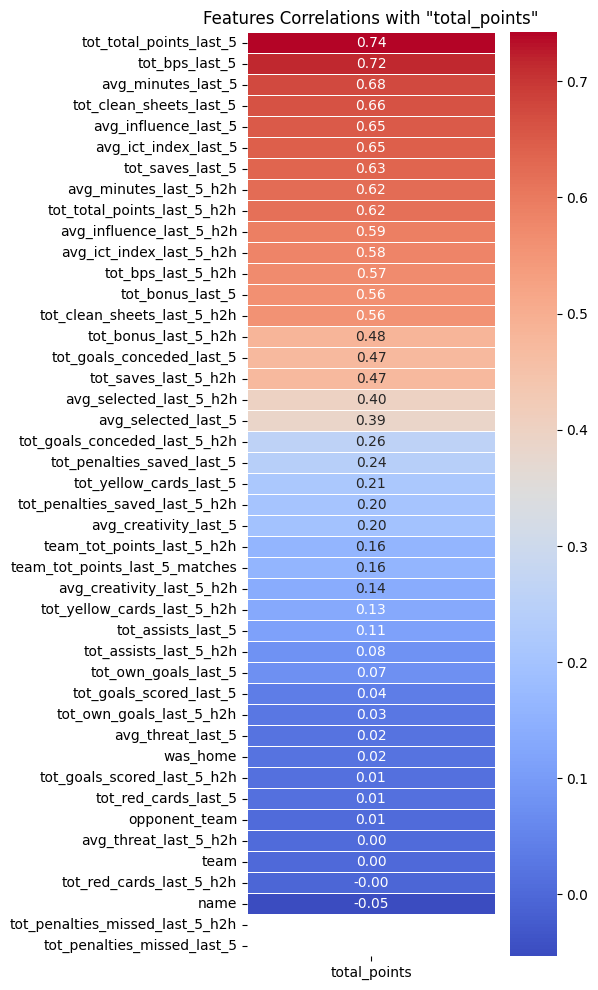

In [44]:
gk_data = df.loc[df.position == 2].drop('position', axis=1)
gk_correlations = calculate_display_correlations(gk_data, 'total_points')

In [45]:
df[(df['position'] == 2) & (df['tot_goals_scored_last_5'] > 0)]['name'].drop_duplicates()

89805    464
98230    100
Name: name, dtype: int32

In [46]:
le_name.classes_[100]

'Alisson Becker'

Defender Position

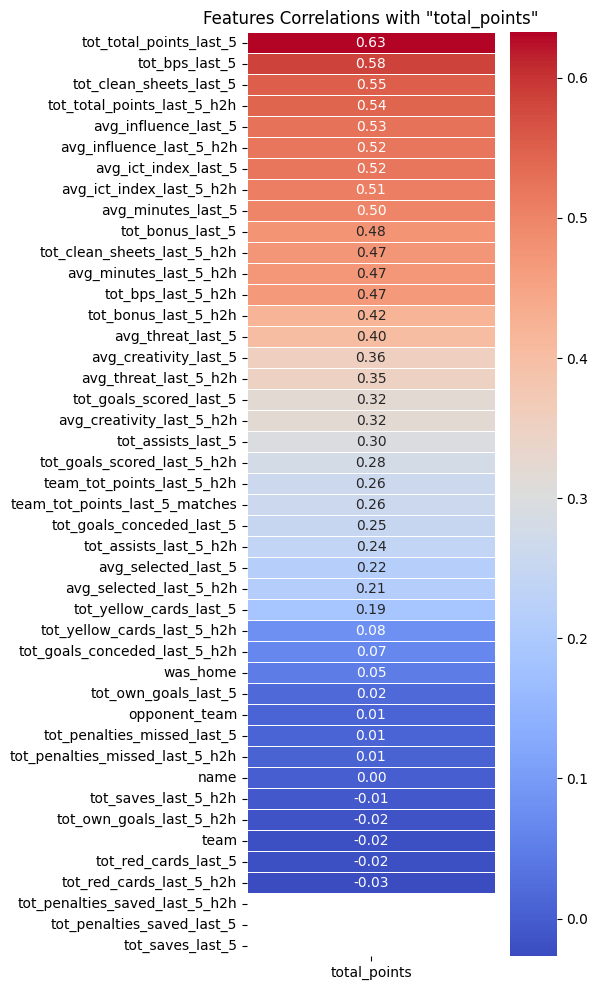

In [47]:
def_data = df.loc[df.position == 0].drop('position', axis=1)
def_correlations = calculate_display_correlations(def_data, 'total_points')

In [48]:
df[(df['position'] == 0) & (df['tot_saves_last_5_h2h'] > 0)]['name'].drop_duplicates()

118246    2205
Name: name, dtype: int32

In [49]:
le_name.classes_[2205]

'Álvaro Fernández'

Midfielder Position

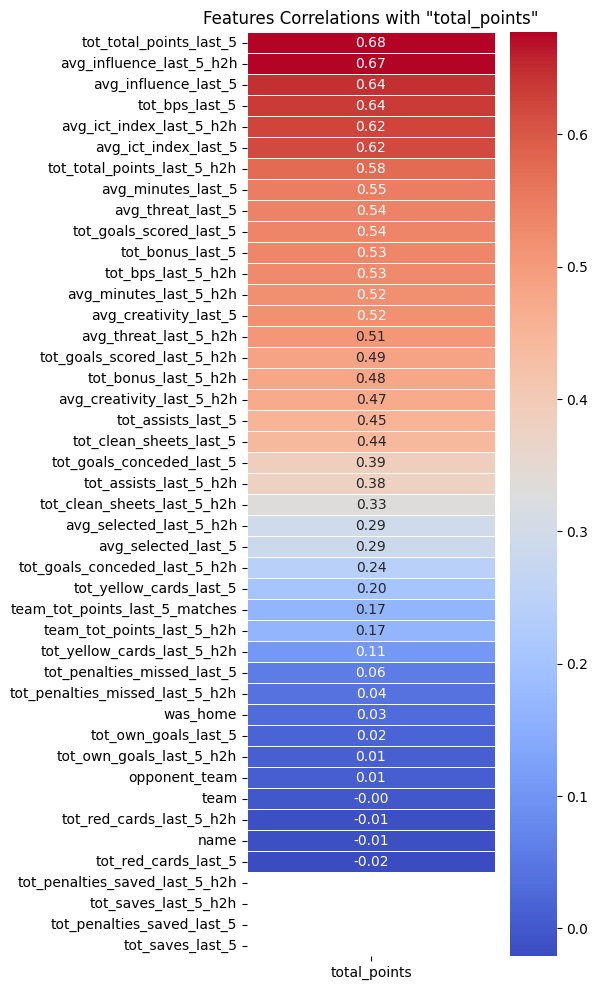

In [50]:
mid_data = df.loc[df.position == 3].drop('position', axis=1)
mid_correlations = calculate_display_correlations(mid_data, 'total_points')

In [51]:
df[(df['position'] == 3) & (df['tot_saves_last_5_h2h'] > 0)]['name'].drop_duplicates()

Series([], Name: name, dtype: int32)

Forward (FWD) Position

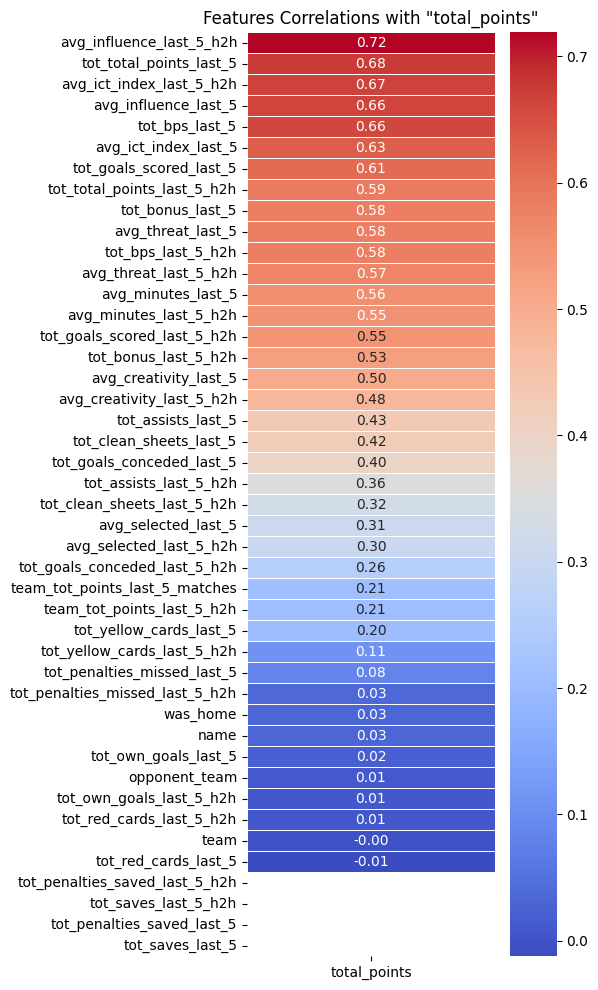

In [52]:
fwd_data = df.loc[df.position == 1].drop('position', axis=1)
fwd_correlations = calculate_display_correlations(fwd_data, 'total_points')

In [53]:
df[(df['position'] == 1) & (df['tot_saves_last_5'] > 0)]

,name,position,team,opponent_team,total_points,was_home,team_tot_points_last_5_matches,team_tot_points_last_5_h2h,tot_assists_last_5_h2h,tot_bonus_last_5_h2h,tot_bps_last_5_h2h,tot_clean_sheets_last_5_h2h,tot_goals_conceded_last_5_h2h,tot_goals_scored_last_5_h2h,tot_own_goals_last_5_h2h,tot_penalties_missed_last_5_h2h,tot_penalties_saved_last_5_h2h,tot_red_cards_last_5_h2h,tot_yellow_cards_last_5_h2h,tot_saves_last_5_h2h,tot_total_points_last_5_h2h,avg_ict_index_last_5_h2h,avg_influence_last_5_h2h,avg_creativity_last_5_h2h,avg_threat_last_5_h2h,avg_selected_last_5_h2h,avg_minutes_last_5_h2h,tot_assists_last_5,tot_bonus_last_5,tot_bps_last_5,tot_clean_sheets_last_5,tot_goals_conceded_last_5,tot_goals_scored_last_5,tot_own_goals_last_5,tot_penalties_missed_last_5,tot_penalties_saved_last_5,tot_red_cards_last_5,tot_yellow_cards_last_5,tot_saves_last_5,tot_total_points_last_5,avg_ict_index_last_5,avg_influence_last_5,avg_creativity_last_5,avg_threat_last_5,avg_selected_last_5,avg_minutes_last_5


### Final Dataset

In [54]:
df

,name,position,team,opponent_team,total_points,was_home,team_tot_points_last_5_matches,team_tot_points_last_5_h2h,tot_assists_last_5_h2h,tot_bonus_last_5_h2h,tot_bps_last_5_h2h,tot_clean_sheets_last_5_h2h,tot_goals_conceded_last_5_h2h,tot_goals_scored_last_5_h2h,tot_own_goals_last_5_h2h,tot_penalties_missed_last_5_h2h,tot_penalties_saved_last_5_h2h,tot_red_cards_last_5_h2h,tot_yellow_cards_last_5_h2h,tot_saves_last_5_h2h,tot_total_points_last_5_h2h,avg_ict_index_last_5_h2h,avg_influence_last_5_h2h,avg_creativity_last_5_h2h,avg_threat_last_5_h2h,avg_selected_last_5_h2h,avg_minutes_last_5_h2h,tot_assists_last_5,tot_bonus_last_5,tot_bps_last_5,tot_clean_sheets_last_5,tot_goals_conceded_last_5,tot_goals_scored_last_5,tot_own_goals_last_5,tot_penalties_missed_last_5,tot_penalties_saved_last_5,tot_red_cards_last_5,tot_yellow_cards_last_5,tot_saves_last_5,tot_total_points_last_5,avg_ict_index_last_5,avg_influence_last_5,avg_creativity_last_5,avg_threat_last_5,avg_selected_last_5,avg_minutes_last_5
0,6,3,0,1,0.194444,0,0.066667,0.066667,0.000000,0.000000,0.098113,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.068182,0.000000,0.000000,0.000000,0.000000,0.010105,0.000000,0.000,0.000000,0.079646,0.0,0.15,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.10,0.011494,0.021277,0.107143,0.013601,0.333333
1,1008,1,0,1,0.194444,0,0.133333,0.133333,0.000000,0.000000,0.098113,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.068182,0.000000,0.000000,0.000000,0.000000,0.000509,0.000000,0.000,0.000000,0.064897,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.059524,0.00,0.000000,0.000000,0.000000,0.000529,0.000000
2,1656,1,0,1,0.222222,0,0.200000,0.200000,0.000000,0.000000,0.109434,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.079545,0.027778,0.000000,0.016129,0.020101,0.004934,0.144444,0.000,0.000000,0.073746,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.00,0.000000,0.010638,0.017857,0.005141,0.066667
3,66,3,0,1,0.194444,0,0.266667,0.266667,0.000000,0.000000,0.098113,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.068182,0.000000,0.000000,0.000000,0.000000,0.003273,0.000000,0.125,0.000000,0.100295,0.0,0.15,0.000000,0.0,0.0,0.0,0.0,0.2,0.0,0.095238,0.10,0.091954,0.095745,0.000000,0.004159,0.322222
4,1796,0,0,1,0.333333,0,0.333333,0.333333,0.000000,0.000000,0.196226,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.25,0.0,0.125000,0.083333,0.182927,0.008065,0.010050,0.003457,1.000000,0.000,0.000000,0.185841,0.2,0.20,0.000000,0.0,0.0,0.0,0.0,0.2,0.0,0.119048,0.15,0.298851,0.010638,0.053571,0.003451,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197536,1761,0,33,32,0.305556,1,0.000000,0.000000,0.166667,0.000000,0.196226,0.0,0.136364,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.147727,0.055556,0.024390,0.040323,0.035176,0.023444,0.422222,0.125,0.142857,0.250737,0.0,0.30,0.181818,0.0,0.0,0.0,0.0,0.2,0.0,0.345238,0.30,0.264368,0.127660,0.196429,0.034380,0.855556
197537,1716,3,33,32,0.194444,1,0.000000,0.000000,0.000000,0.000000,0.120755,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.090909,0.027778,0.006098,0.040323,0.020101,0.021194,0.077778,0.000,0.000000,0.085546,0.0,0.10,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.00,0.011494,0.021277,0.017857,0.038412,0.200000
197538,609,3,33,32,0.194444,1,0.000000,0.000000,0.000000,0.000000,0.098113,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.068182,0.000000,0.000000,0.000000,0.000000,0.000129,0.000000,0.000,0.000000,0.064897,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.059524,0.00,0.000000,0.000000,0.000000,0.000192,0.000000
197539,1132,0,33,32,0.194444,1,0.000000,0.000000,0.000000,0.000000,0.098113,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.068182,0.000000,0.000000,0.000000,0.000000,0.000251,0.000000,0.000,0.000000,0.064897,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.059524,0.00,0.000000,0.000000,0.000000,0.000332,0.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197541 entries, 0 to 197540
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   name                             197541 non-null  int32  
 1   position                         197541 non-null  int32  
 2   team                             197541 non-null  int32  
 3   opponent_team                    197541 non-null  int32  
 4   total_points                     197541 non-null  float64
 5   was_home                         197541 non-null  int64  
 6   team_tot_points_last_5_matches   197541 non-null  float64
 7   team_tot_points_last_5_h2h       197541 non-null  float64
 8   tot_assists_last_5_h2h           197541 non-null  float64
 9   tot_bonus_last_5_h2h             197541 non-null  float64
 10  tot_bps_last_5_h2h               197541 non-null  float64
 11  tot_clean_sheets_last_5_h2h      197541 non-null  float64
 12  to

In [56]:
df.columns

Index(['name', 'position', 'team', 'opponent_team', 'total_points', 'was_home',
       'team_tot_points_last_5_matches', 'team_tot_points_last_5_h2h',
       'tot_assists_last_5_h2h', 'tot_bonus_last_5_h2h', 'tot_bps_last_5_h2h',
       'tot_clean_sheets_last_5_h2h', 'tot_goals_conceded_last_5_h2h',
       'tot_goals_scored_last_5_h2h', 'tot_own_goals_last_5_h2h',
       'tot_penalties_missed_last_5_h2h', 'tot_penalties_saved_last_5_h2h',
       'tot_red_cards_last_5_h2h', 'tot_yellow_cards_last_5_h2h',
       'tot_saves_last_5_h2h', 'tot_total_points_last_5_h2h',
       'avg_ict_index_last_5_h2h', 'avg_influence_last_5_h2h',
       'avg_creativity_last_5_h2h', 'avg_threat_last_5_h2h',
       'avg_selected_last_5_h2h', 'avg_minutes_last_5_h2h',
       'tot_assists_last_5', 'tot_bonus_last_5', 'tot_bps_last_5',
       'tot_clean_sheets_last_5', 'tot_goals_conceded_last_5',
       'tot_goals_scored_last_5', 'tot_own_goals_last_5',
       'tot_penalties_missed_last_5', 'tot_penalties_save

In [57]:
le_name.classes_.tolist()

['Aaron Connolly',
 'Aaron Cresswell',
 'Aaron Hickey',
 'Aaron Lennon',
 'Aaron Mooy',
 'Aaron Ramsdale',
 'Aaron Ramsey',
 'Aaron Rowe',
 'Aaron Wan-Bissaka',
 'Abdelhamid Sabiri',
 'Abdoulaye Doucouré',
 'Abdul Baba',
 'Abdul Fatawu',
 'Abel Hernández',
 'Aboubakar Kamara',
 'Abu Kamara',
 'Adalberto Peñaranda',
 'Adam Armstrong',
 'Adam Clayton',
 'Adam Davies',
 'Adam Federici',
 'Adam Forshaw',
 'Adam Idah',
 'Adam Lallana',
 'Adam Legzdins',
 'Adam Masina',
 'Adam Matthews',
 'Adam Reach',
 'Adam Smith',
 'Adam Webster',
 'Adam Wharton',
 'Adama Diakhaby',
 'Adama Diomande',
 'Adama Traoré',
 'Ademola Lookman',
 'Ademola Ola-Adebomi',
 'Adler Nascimento',
 'Adlène Guédioura',
 'Admiral Muskwe',
 'Adnan Januzaj',
 'Adrian Blake',
 'Adrian Mariappa',
 'Adrian Mazilu',
 'Adrien Silva',
 'Adrián Bernabé',
 'Ahmed El Mohamady',
 'Ahmed Hegazy',
 'Ahmed Musa',
 'Aidan Francis-Clarke',
 "Aiden O'Neill",
 'Ainsley Maitland-Niles',
 'Aji Alese',
 'Akin Famewo',
 'Albert Adomah',
 'Albert

In [58]:
le_position.classes_

array(['DEF', 'FWD', 'GK', 'MID'], dtype=object)

In [59]:
le_team.classes_

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton & Hove Albion', 'Burnley', 'Cardiff City', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield Town',
       'Hull City', 'Ipswich Town', 'Leeds United', 'Leicester City',
       'Liverpool', 'Luton Town', 'Manchester City', 'Manchester United',
       'Middlesbrough', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Sheffield United', 'Southampton',
       'Stoke City', 'Sunderland', 'Swansea City', 'Tottenham Hotspur',
       'Watford', 'West Bromwich United', 'West Ham United',
       'Wolverhampton Wanderers'], dtype=object)